In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# LSTM model
class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_Model, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (seq_len, batch_size, input_size)
        h0 = torch.zeros(1, x.size(1), self.hidden_size).to(x.device)  # Initial hidden state
        c0 = torch.zeros(1, x.size(1), self.hidden_size).to(x.device)  # Initial cell state

        # LSTM forward pass
        out, _ = self.lstm(x, (h0, c0))
        out = self.linear(out[-1])  # We only care about the last time step

        return out

In [9]:
# Generate data for addition problem (pairs of numbers)
def generate_addition_data(seq_length, num_samples):
    X = []
    Y = []
    for _ in range(num_samples):
        x1 = np.random.randint(0, 100)
        x2 = np.random.randint(0, 100)
        seq = np.array([[x1], [x2]])  # Shape (2, 1) for each pair
        sum_seq = x1 + x2  # Target output: the sum
        X.append(seq)
        Y.append(sum_seq)
    return np.array(X), np.array(Y)

In [11]:
# Hyperparameters
input_size = 1  # Single number at each timestep
hidden_size = 64
output_size = 1  # Output will be a single number (sum)
seq_length = 2  # Each pair of numbers is given as a sequence of length 2
num_samples = 1000
learning_rate = 0.001
epochs = 5000

In [13]:
# Generate data
X, Y = generate_addition_data(seq_length, num_samples)

In [15]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)  # Flatten to (num_samples, 1)

# Create the LSTM model, loss function and optimizer
model = LSTM_Model(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_tensor.permute(1, 0, 2))  # Change shape to (seq_len, batch_size, input_size)
    loss = criterion(outputs, Y_tensor)
    losses.append(loss.item())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')


Epoch 0/5000, Loss: 11785.029296875
Epoch 100/5000, Loss: 10104.2861328125
Epoch 200/5000, Loss: 8677.1845703125
Epoch 300/5000, Loss: 7585.697265625
Epoch 400/5000, Loss: 6687.99609375
Epoch 500/5000, Loss: 5918.6943359375
Epoch 600/5000, Loss: 5252.00830078125
Epoch 700/5000, Loss: 4672.50927734375
Epoch 800/5000, Loss: 4139.27001953125
Epoch 900/5000, Loss: 3654.978759765625
Epoch 1000/5000, Loss: 3237.7265625
Epoch 1100/5000, Loss: 2870.77001953125
Epoch 1200/5000, Loss: 2547.20947265625
Epoch 1300/5000, Loss: 2261.5244140625
Epoch 1400/5000, Loss: 2009.373291015625
Epoch 1500/5000, Loss: 1786.8294677734375
Epoch 1600/5000, Loss: 1590.3052978515625
Epoch 1700/5000, Loss: 1416.596923828125
Epoch 1800/5000, Loss: 1263.14892578125
Epoch 1900/5000, Loss: 1127.7001953125
Epoch 2000/5000, Loss: 1008.0117797851562
Epoch 2100/5000, Loss: 902.1421508789062
Epoch 2200/5000, Loss: 808.2752685546875
Epoch 2300/5000, Loss: 725.0906372070312
Epoch 2400/5000, Loss: 651.3707275390625
Epoch 2500/50

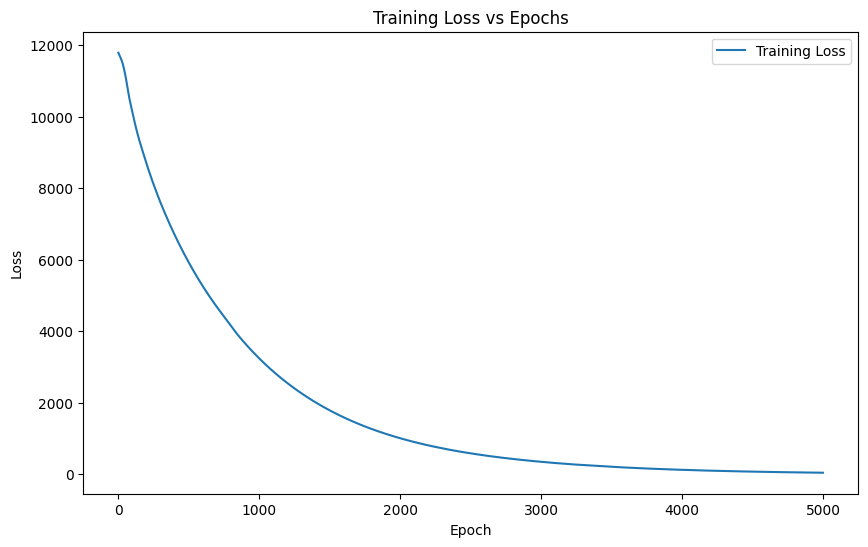

In [16]:
# Plotting loss over time
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

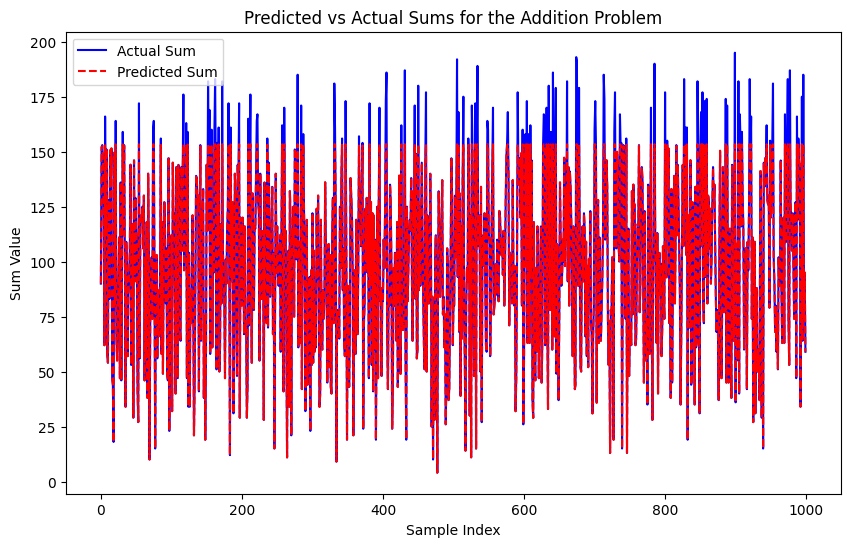

In [17]:
# Visualizing predictions vs actuals
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predicted = model(X_tensor.permute(1, 0, 2))

# Plot predictions vs actual sums
plt.figure(figsize=(10, 6))
plt.plot(Y_tensor.numpy(), label='Actual Sum', color='blue')
plt.plot(predicted.numpy(), label='Predicted Sum', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Sum Value')
plt.title('Predicted vs Actual Sums for the Addition Problem')
plt.legend()
plt.show()
